Exploratory Data Analysis is process of exmining data such as summurizing main characteristics and finding interesting hidden relations between variables of data.
**Steps of EDA are as following.**
1. Understanding Data
2. Cleaning the Data
3. Analysis of relationship between variables

In [128]:
# Importing Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [129]:
# Reading data
P_Ec_Dataset= pd.read_csv("../input/pakistan-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning:

Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



**1. UNDERSTANDING THE DATA**

In [130]:
# Understanding shape and data structure
#P_Ec_Dataset.shape
#P_Ec_Dataset.head()
#P_Ec_Dataset.tail()

In [131]:
# Understanding Data discriptions and variables
P_Ec_Dataset.nunique()
#P_Ec_Dataset.info()
#P_Ec_Dataset.describe()

item_id                  584524
status                       16
created_at                  789
sku                       84889
price                      9121
qty_ordered                  74
grand_total               36829
increment_id             408785
category_name_1              16
sales_commission_code      7226
discount_amount           28058
payment_method               18
Working Date                789
BI Status                     4
 MV                        9720
Year                          3
Month                        12
Customer Since               26
M-Y                          26
FY                            3
Customer ID              115326
Unnamed: 21                   0
Unnamed: 22                   0
Unnamed: 23                   0
Unnamed: 24                   0
Unnamed: 25                   0
dtype: int64

Now for better understanding, we are going to look for issues in Datasets so that we can clean data.
1. looking for Null values.
2. spaces in columns' name.
3. Outliers in Dataset.

In [132]:
# Looking for Null values in Datasets
#P_Ec_Dataset.isnull()
#P_Ec_Dataset.isnull().sum()
#sns.heatmap(P_Ec_Dataset.isnull(), yticklabels=False, cbar= False, cmap='viridis'

1. From above lines of codes we really can't conclude any specific conclusion for null values.
2. So, now we lets plot null values with percentage.

<AxesSubplot:>

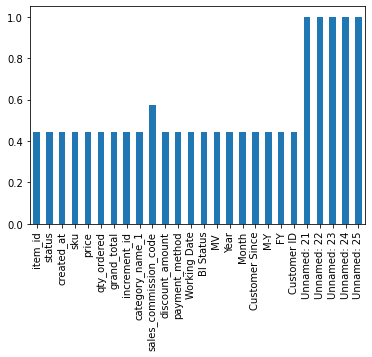

In [133]:
# For doing so let's plot mean of null values
MeanP_Ec= P_Ec_Dataset.isnull().mean()
MeanP_Ec.plot.bar()

In [134]:
#Looking for spaces in columns' names
P_Ec_Dataset.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [135]:
#Reason why we need to remove spaces from columns' name
#P_Ec_Dataset.MV

**OUTLIERS**
1. An outlier is an observation that lies an abnormal distance from other values in a random sample      from a population.
2. If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop    the outlier

In [136]:
# Looking for outliers in all integer variables
P_Ec_Dataset.dtypes

#So we have 8 float types where we can look for outliers
#sns.boxplot(x= P_Ec_Dataset['item_id'])
#sns.boxplot(x= P_Ec_Dataset['price'])
#sns.boxplot(x= P_Ec_Dataset['qty_ordered'])
#sns.boxplot(x= P_Ec_Dataset['grand_total'])
#sns.boxplot(x= P_Ec_Dataset['discount_amount'])
#sns.boxplot(x= P_Ec_Dataset['Year'])
#sns.boxplot(x= P_Ec_Dataset['Month'])
#sns.boxplot(x= P_Ec_Dataset['Customer ID'])

item_id                  float64
status                    object
created_at                object
sku                       object
price                    float64
qty_ordered              float64
grand_total              float64
increment_id              object
category_name_1           object
sales_commission_code     object
discount_amount          float64
payment_method            object
Working Date              object
BI Status                 object
 MV                       object
Year                     float64
Month                    float64
Customer Since            object
M-Y                       object
FY                        object
Customer ID              float64
Unnamed: 21              float64
Unnamed: 22              float64
Unnamed: 23              float64
Unnamed: 24              float64
Unnamed: 25              float64
dtype: object

After plotting all columns(float type), We have 4 features where we have outliers.Now for outliers we have to decide whether to remove them or not. we will decide it later. 
1. price
2. qty_ordered
3. grand_total
4. discount_amount


Conclusion:
1. We have last 5 columns 100% null. (Must bee droped)
2. We have around 43% of rows null from lower data. (Must be droped)
3. We have space in name of column MV. (Must be renamed)
4. We have outlirs in dataset. (It seems to me that these outliers are part of data and will effct      data if removed. So, we aree not removing these outliers)

**2. CLEANING THE DATASET**

In [137]:
# Removing last 5 columns.
P_Ec_Dataset.drop(["Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], axis=1, inplace=True)

In [138]:
P_Ec_Dataset.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [139]:
# Removing 43% of tail rows from dataset
P_Ec_Dataset.dropna(how='all', inplace=True)
#P_Ec_Dataset.tail()

<AxesSubplot:>

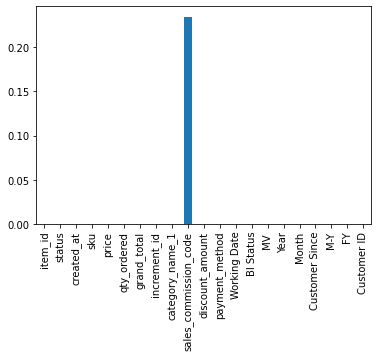

In [140]:
P_Ec_Dataset.shape

# Checking for null values
MeanP_Ec= P_Ec_Dataset.isnull().mean()
MeanP_Ec.plot.bar()

From above graph we can say that now there aree no null values except than sales_commision_code

In [141]:
P_Ec_Dataset.rename(columns={" MV ":"MV"}, inplace=True)

Let's fill th remaining null values

**3. ANALYSIS OF REELEATION BEWEN VARIABLES**

**Best selling category**

For best selling category we need only orders with completation status:

In [142]:
P_Ec_Dataset.status.unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

1. Now we need orders that are either completed or paid or received.
2. Now wee will make subset of data that will only have compleeted/paid/recived orders.

In [143]:
Best_S_Category= P_Ec_Dataset[(P_Ec_Dataset['status'] == 'complete') | (P_Ec_Dataset['status'] == 'paid') | (P_Ec_Dataset['status'] == 'received')]

In [144]:
Best_S_Category.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
6,211138.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147449,Beauty & Grooming,\N,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,7.0
7,211139.0,complete,7/1/2016,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,\N,...,cod,7/1/2016,Net,170,2016.0,7.0,2016-7,7-2016,FY17,6.0
10,211142.0,complete,7/1/2016,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453,Appliances,\N,...,cod,7/1/2016,Net,"5,500",2016.0,7.0,2016-7,7-2016,FY17,9.0


In [145]:
#Compleeted Orders
Best_S_Category.shape

(312134, 21)

<AxesSubplot:>

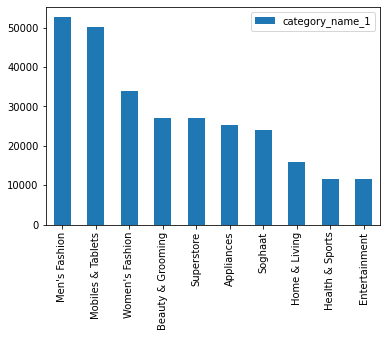

In [146]:
#Plotting the categories
catg_chart = Best_S_Category['category_name_1'].value_counts().nlargest(10).to_frame()
catg_chart.plot.bar()

**Best selling category is men's fashion**

**Visulaize payment method and order status frequency**

<AxesSubplot:>

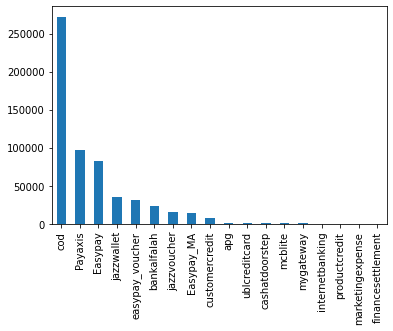

In [147]:
# Visualization for payment method
#P_Ec_Dataset.columns
P_Ec_Dataset.payment_method.nunique()
P_Ec_Dataset.payment_method.unique()

PayM_Frequency= P_Ec_Dataset.payment_method.value_counts()
PayM_Frequency.plot.bar()

**Above graph shows frequencies of payment method and it is clear that CoD is frequently used followed by payaxis and easypaisa**

<AxesSubplot:>

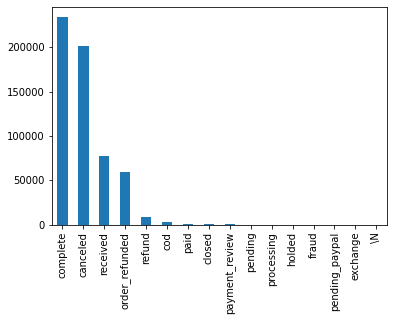

In [148]:
# Visualization for Order status
P_Ec_Dataset.columns
P_Ec_Dataset.status.nunique()
P_Ec_Dataset.status.unique()

Status_Frequency= P_Ec_Dataset.status.value_counts()
Status_Frequency.plot.bar()

**Above graph shows that completed order status has more frequency**

**Corelation btween payment method and order status**

In [149]:
#sns.pairplot(P_Ec_Dataset)
#let's make a group of payment method and order status
Corelation_PM_OS= P_Ec_Dataset.groupby(['payment_method','status'])['grand_total'].sum().reset_index(name='sum')

#plotting sum of group 
fig= px.bar(Corelation_PM_OS, x="payment_method", y="sum", color="status", title="Relation between paymnt method and order status")
fig.show()

From above graph we hav conclusion as:
1. Most of completed orders are through CoD followed by easypay voucher and payaxis
2. Most canceled orders have Easypay followed by payaxis and bankalfalah as contributers
3. Bankalfalah is most contributer to refunded orders

**Corelation between order date and item category**

In [150]:
P_Ec_Dataset.columns
#P_Ec_Dataset["Working Date"]

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [151]:
Corelation_OD_CN = P_Ec_Dataset.groupby(['Working Date','category_name_1']).size().reset_index(name='count')
#Corelation_OD_CN['Percentage'] = 100 * Corelation_OD_CN['count'] / Corelation_OD_CN.groupby('Working Date')['count'].transform('sum')
fig = px.bar(Corelation_OD_CN, x="Working Date", y="count", color="category_name_1", title="Daily Transactions by Item Category")
fig.show()

From above graph we have results that shows relation between dates and categories but I can't conclude any specific points.

**Find any hidden patterns that are counter-intuitive for a layman**